In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, names=cols)

In [8]:
cols = ['SL',"SW",'PL','PW','Class']

In [9]:
df

,SL,SW,PL,PW,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


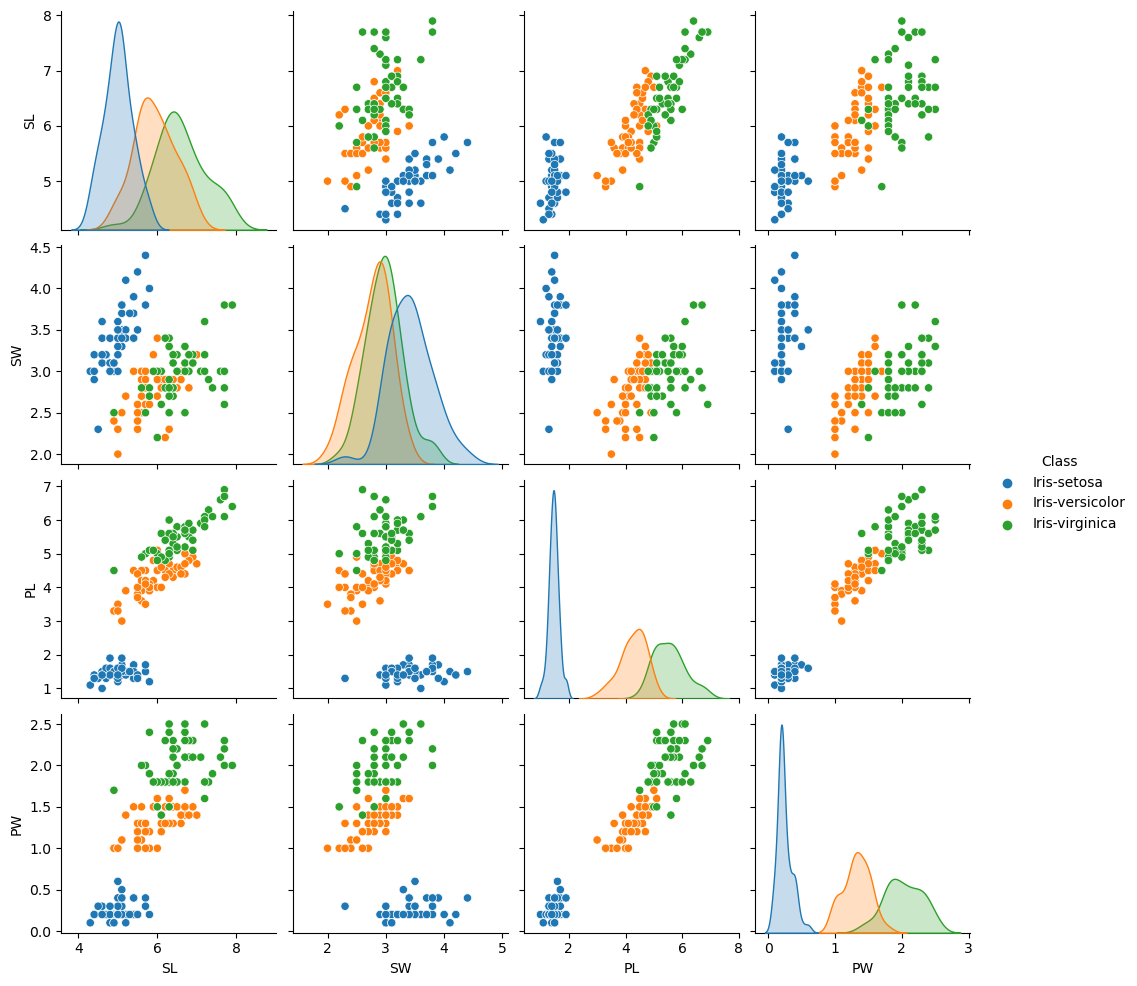

In [15]:
sns.pairplot(df, hue = 'Class')

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()

y = le.fit_transform(df['Class'])

In [20]:
x = df.iloc[:,:-1]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.25, random_state=1)

In [23]:
svm = SVC()

svm.fit(xtrain,ytrain)

ypred = svm.predict(xtest)

In [24]:
ypred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0])

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [27]:
svm.score(xtrain,ytrain), svm.score(xtest,ytest)

(0.9732142857142857, 0.9736842105263158)

In [28]:
from sklearn.model_selection import GridSearchCV

In [ ]:
svc = SVC()

In [29]:
params = {
    'C' : [0.01,0.001,1,10,18],
    'kernel' : ['linear','rbf','poly'],
    'gamma' : [0.1,1,2,3,4,5]
}

In [30]:
grid = GridSearchCV(SVC(), param_grid=params)

In [31]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.001, 1, 10, 18],
                         'gamma': [0.1, 1, 2, 3, 4, 5],
                         'kernel': ['linear', 'rbf', 'poly']})

In [32]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}

In [33]:
grid.best_score_

0.982213438735178

In [34]:
model = SVC(C = 1, gamma = 0.1, kernel = 'linear')

In [36]:
model.fit(xtrain,ytrain)

ypred =  model.predict(xtest)

In [37]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [38]:
model.score(xtrain,ytrain), model.score(xtest,ytest)

(0.9821428571428571, 1.0)